**About Dataset**

**Context**

Melbourne is the coastal capital of the southeastern Australian state of Victoria. Melbourne is currently experiencing a housing bubble (some experts say it may burst soon). The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from Central Business District.


 **Link to dataset in kaggle**
https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot/data



**The problem statement**

Estimate housing prices by using Machine Learning models.

**The target variable**

The Targeted column is Price: Price in dollars.

**Number of features:** 21

**Number of samples in dataset:** 13580


**Column Descriptions:**

1- Suburb

2- Address       

3- Rooms: Number of rooms

4- Price: Price in dollars

5- Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

6- Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

7- SellerG: Real Estate Agent

8- Date: Date sold

9- Distance: Distance from CBD

10- Postcode:

11- Regionname: General Region (West, North West, North, North east …etc)

12- Propertycount: Number of properties that exist in the suburb.

13- Bedroom2 : Scraped # of Bedrooms (from different source)

14- Bathroom: Number of Bathrooms

15- Car: Number of carspots

16- Landsize: Land Size

17- BuildingArea: Building Size

18- YearBuilt

19- CouncilArea: Governing council for the area

20- Lattitude     

21- Longtitude     



###**Import Libraries**

lets start the project by importing all the libraries that we will need in the project.


In [ ]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# 2. To Viusalize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer
from matplotlib.colors import ListedColormap

# 3. To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# 4. import Iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 5. Machine Learning
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score

# 6. For Classification task.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,RandomForestRegressor
from xgboost import XGBClassifier

# 7. Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 8. Ignore warnings
import warnings
warnings.filterwarnings('ignore')

###**Load the Dataset**

In [352]:
#Upload the Dataset from my computer
from google.colab import files
uploaded = files.upload()


Saving melb_data.csv to melb_data (1).csv


In [354]:
# Load the dataset
df = pd.read_csv("/content/melb_data.csv")

# print the first 5 rows of the dataframe
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


###**Exploratory Data Analysis (EDA)**

#**Explore Each Column**


In [355]:
# Checking the data shape, The shape function displays the number of rows and columns in the dataset
df.shape # check dimention

(13580, 21)

In [356]:
# Exploring the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [357]:
# Checking the data types to see if all the data is in correct format. All the data seems to be in their required format.
df.dtypes  # checking the data type of every column

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [358]:
df["Month"] = pd.to_datetime(df["Date"], format="%d/%m/%Y").dt.month

In [359]:
df["Year"] = pd.to_datetime(df["Date"], format="%d/%m/%Y").dt.year

In [360]:
df.drop(["Date"], axis=1, inplace=True)

In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Distance       13580 non-null  float64
 8   Postcode       13580 non-null  float64
 9   Bedroom2       13580 non-null  float64
 10  Bathroom       13580 non-null  float64
 11  Car            13518 non-null  float64
 12  Landsize       13580 non-null  float64
 13  BuildingArea   7130 non-null   float64
 14  YearBuilt      8205 non-null   float64
 15  CouncilArea    12211 non-null  object 
 16  Lattitude      13580 non-null  float64
 17  Longtitude     13580 non-null  float64
 18  Region

In [362]:
#generate various summary statistics of a DataFrame
#Note: Only features with numeric data are considered
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Month,Year
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378,7.052283,2016.533432
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772,2.536034,0.498899
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000,1.000000,2016.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000,5.000000,2016.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000,7.000000,2017.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000,9.000000,2017.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000,12.000000,2017.000000


###Visualization coulumns in dataset

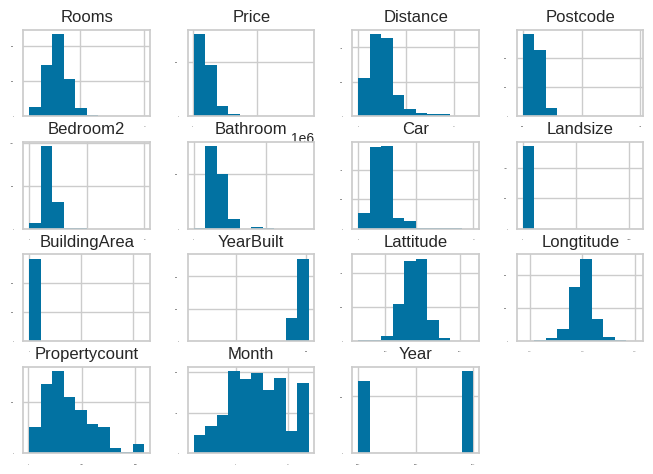

In [363]:
# histograms-Histogram Plots of Each Attribute
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

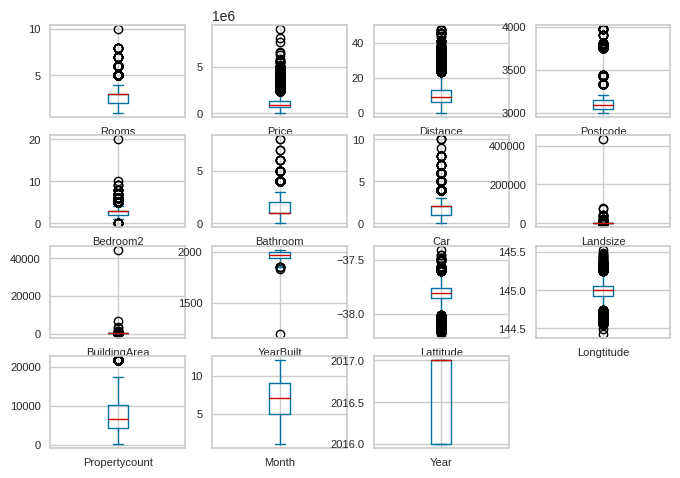

In [364]:
#box and whisker plots
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
fontsize=8)
plt.show()

## **Target variable**

Visualizations are used to understand the relationship between the target variable and the features, in addition to the quantatitave metrics such as correlation coefficient and p-value. The visuals include regression plot, boxplot etc.

In [365]:
# Price column
df['Price'].min(), df['Price'].max()

(85000.0, 9000000.0)

In [366]:
df.Price.describe()

count    1.358000e+04
mean     1.075684e+06
std      6.393107e+05
min      8.500000e+04
25%      6.500000e+05
50%      9.030000e+05
75%      1.330000e+06
max      9.000000e+06
Name: Price, dtype: float64

Mean 1075684.079455081
Median 903000.0
Mode 0    1100000.0
Name: Price, dtype: float64


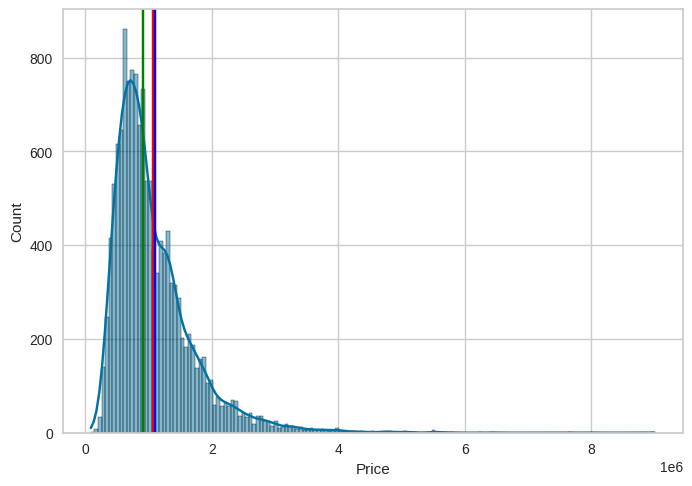

In [367]:
# Plot the mean, Median and mode of Price column using sns
sns.histplot(df['Price'], kde=True)
plt.axvline(df['Price'].mean(), color='Red')
plt.axvline(df['Price'].median(), color= 'Green')
plt.axvline(df['Price'].mode()[0], color='Blue')

# print the value of mean, median and mode of Price column
print('Mean', df['Price'].mean())
print('Median', df['Price'].median())
print('Mode', df['Price'].mode())

<Axes: >

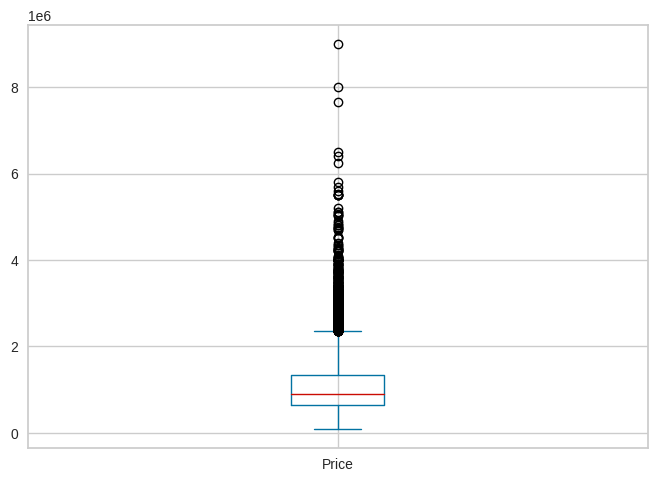

In [368]:
df.Price.plot.box() ### Target price

In [369]:
### There are outliers in the target variable, lets elimanate

df = df[~(df.Price > 6000000)]


<Axes: ylabel='Frequency'>

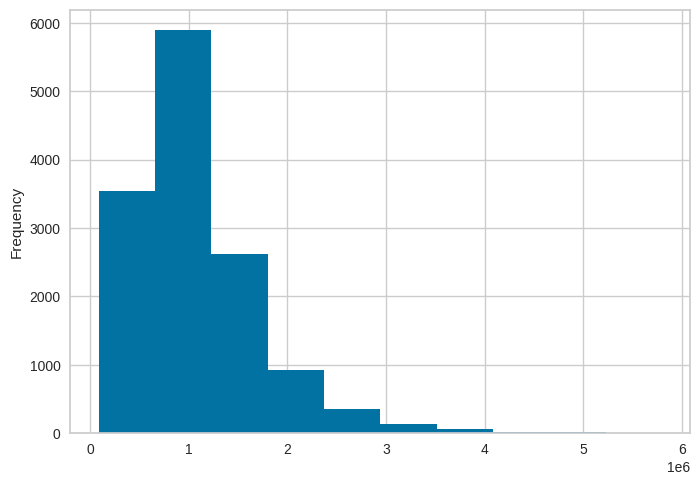

In [370]:
df.Price.plot.hist()

#**1- Data Cleaning**

## **a- Handling Missing values**


In [371]:
#Checking for null values in each column and displaying the sum of all null values in each column
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1368
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
Month               0
Year                0
dtype: int64

In [372]:
#### 1- Checking null values -> percentages

df.isnull().sum()/len(df)

Suburb           0.000000
Address          0.000000
Rooms            0.000000
Type             0.000000
Price            0.000000
Method           0.000000
SellerG          0.000000
Distance         0.000000
Postcode         0.000000
Bedroom2         0.000000
Bathroom         0.000000
Car              0.004568
Landsize         0.000000
BuildingArea     0.475173
YearBuilt        0.395978
CouncilArea      0.100781
Lattitude        0.000000
Longtitude       0.000000
Regionname       0.000000
Propertycount    0.000000
Month            0.000000
Year             0.000000
dtype: float64

In [373]:
# find missing values and sort result
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)

BuildingArea    6450
YearBuilt       5375
CouncilArea     1368
Car               62
dtype: int64

In [374]:
##store missing data in varible
missing_data_cols = df.isnull().sum()[df.isnull().sum()>0].index.tolist()

missing_data_cols

['Car', 'BuildingArea', 'YearBuilt', 'CouncilArea']

Removing the rows with empty values since the number of empty rows is small and the dataset is huge.
This is the best approach compared to replacing with mean or random values for this case study.


In [375]:
### Car is very less we can drop those value without losing too much data
## df.dropna()  to Drop the rows where at least one element is missing.
## Define in which columns to look for missing values. In our case Car column
df.dropna(subset=['Car', 'CouncilArea'], inplace=True)

In [378]:
# Checking if null values are eliminated

df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea     5765
YearBuilt        4763
CouncilArea         0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
Month               0
Year                0
dtype: int64

In [379]:
### 'Building area' and 'year built' have huge number of null value, so, we will drop these coulumn
#df.fillna(np.mean, inplace=True)

### columns not useful

df.drop(['BuildingArea','YearBuilt'], axis=1, inplace = True)

In [380]:
## Now we have df with dimention
df.shape

(12206, 20)

Using Exploratory data analysis, few features can be dropped because they had no impact on the price prediction. Those features are removed with the function below.

In [381]:
### columns not useful

df.drop(['SellerG','Method'], axis=1, inplace = True)
#df = df.drop(['SellerG','Method'], axis=1)

In [382]:
## Now we have df with dimention
df.shape

(12206, 18)

**After handling missing values, now we have 12206 samples and 18 features.**

## **b- Remove Outliers**

<Axes: >

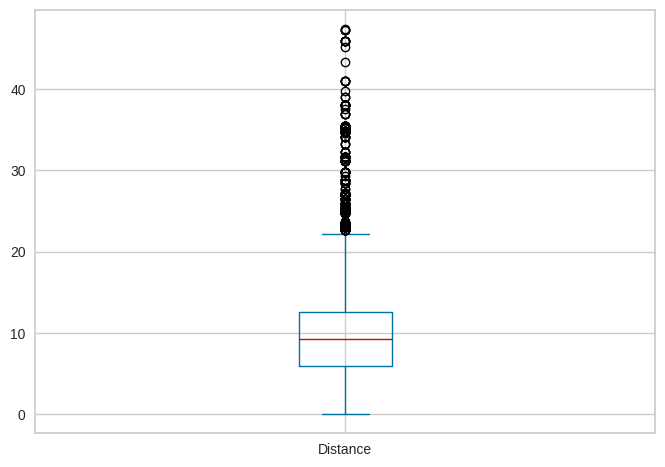

In [384]:
### There are outliers in the target variable, lets elimanate
df.Distance.plot.box()

### Distance values are continous, there are no outliers here.

<Axes: >

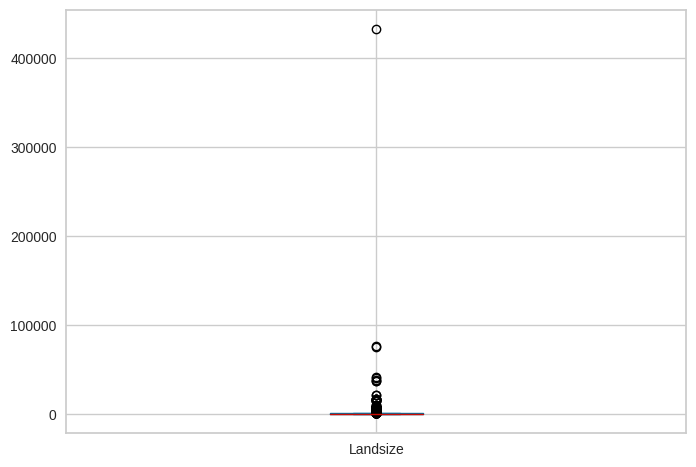

In [387]:
df.Landsize.plot.box()


In [388]:
df = df[~(df.Landsize > 30000)]

<Axes: >

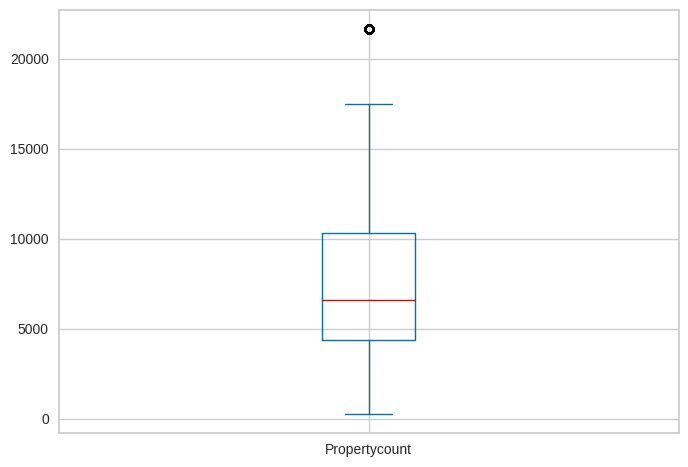

In [389]:
df.Propertycount.plot.box()

In [390]:
df = df[~(df.Propertycount > 20000)]

#**2- Data Pre-processing**

## **a- Regression plot**


In [393]:
# find Numerical Columns
Num_cols = df.select_dtypes(exclude='object').columns.tolist()
Num_cols
print(f'numerical Columns: {Num_cols}')

numerical Columns: ['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'Lattitude', 'Longtitude', 'Propertycount', 'Month', 'Year']


The Pearson Correlation Coefficient is 0.5181795585154841  with a P-value of P = 0.0


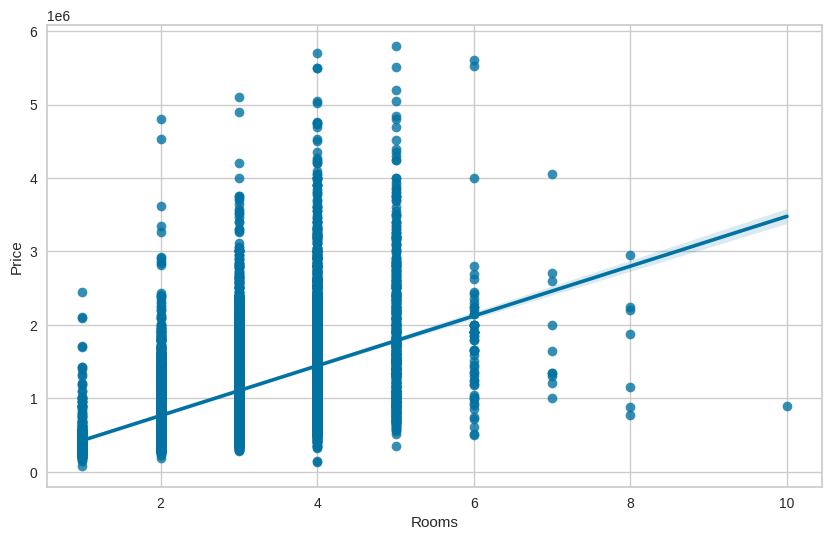

In [394]:
import seaborn as sns
from scipy import stats
plt.figure(figsize=(10,6))
sns.regplot(x="Rooms", y="Price", data=df)
pearson_coef, p_value = stats.pearsonr(df['Rooms'], df['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

This regression plot show the correlation between Rooms and price. A positive correlation is observed which shows that price is being affected by the change in number of rooms.

-- P-value of 0.0 means (more confidently say the feature is correlated to target) and that the correlation is extremely unlikely to have occurred by random chance, indicating strong statistical significance.

-- The p value here (that corresponds to Rooms) confirms strong correlation, hence this feature is a critical feature to the prediction of used house price.

The Pearson Correlation Coefficient is -0.14561219842965334  with a P-value of P = 2.7678038501885395e-57


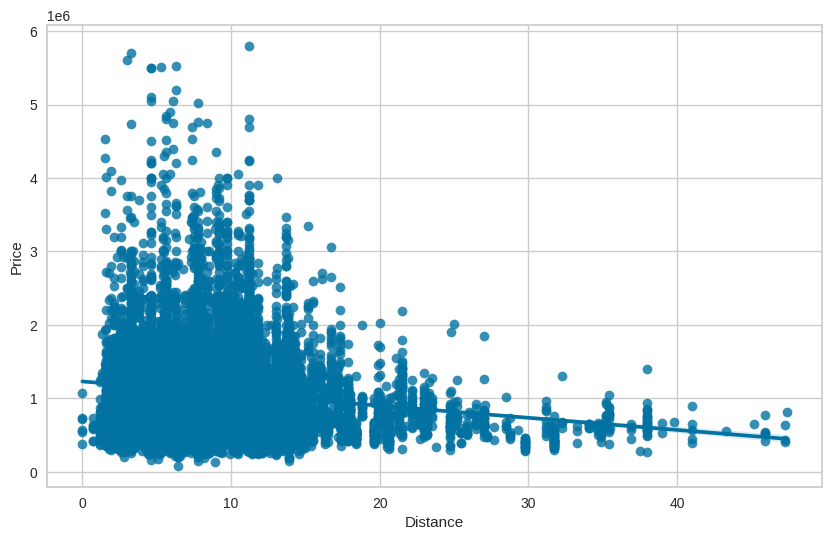

In [395]:
plt.figure(figsize=(10,6))
sns.regplot(x="Distance", y="Price", data=df)
pearson_coef, p_value = stats.pearsonr(df['Distance'], df['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

This regression plot show the correlation between *Distance* and *Price*. A slight negative correlation is observed which shows that price is being affected by the change in distance value. Distance is a good feature.
Here, the Pearson Correlation Coefficient r: is approximately -0.146, which is closer to 0. This indicates a weak or no linear relationship. In other words, the variables are not strongly correlated.


The Pearson Correlation Coefficient is 0.4746204390869321  with a P-value of P = 0.0


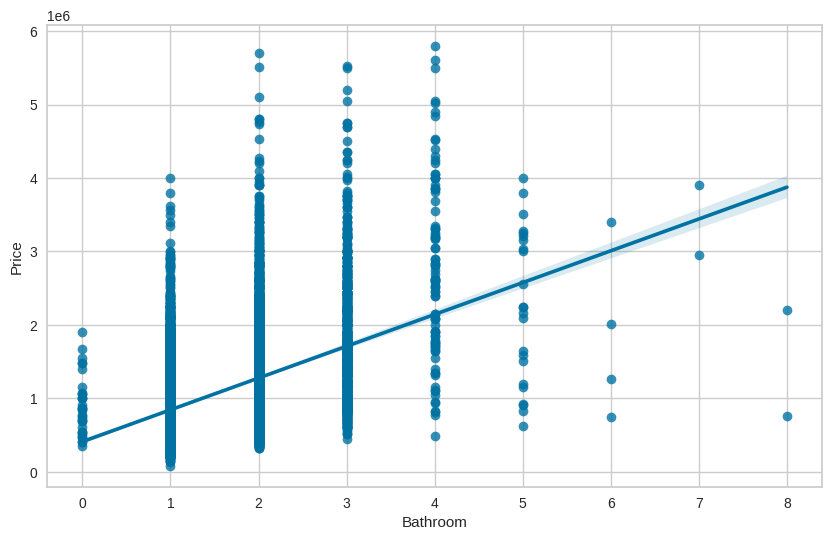

In [396]:
plt.figure(figsize=(10,6))
sns.regplot(x="Bathroom", y="Price", data=df)
pearson_coef, p_value = stats.pearsonr(df['Bathroom'], df['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

A positive correlation is observed which shows that price is being affected by the change in number of bathroom.
-- The p value here = 0 (that corresponds to Bathroom) confirms strong correlation, hence this feature is a critical feature to the prediction of used house price.

<Axes: xlabel='Car', ylabel='Price'>

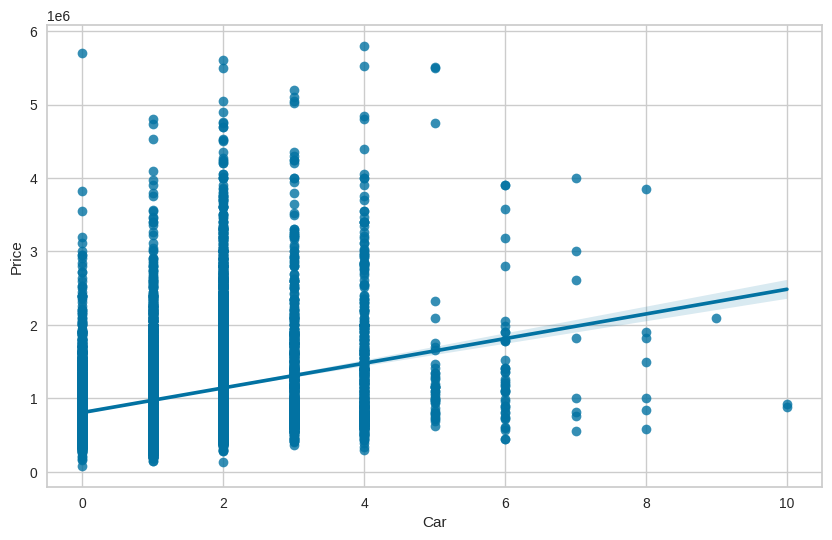

In [397]:
plt.figure(figsize=(10,6))
sns.regplot(x="Car", y="Price", data=df)
#pearson_coef, p_value = stats.pearsonr(df['Car'], df['Price'])
#print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.1152947614389255  with a P-value of P = 1.976314374574581e-36


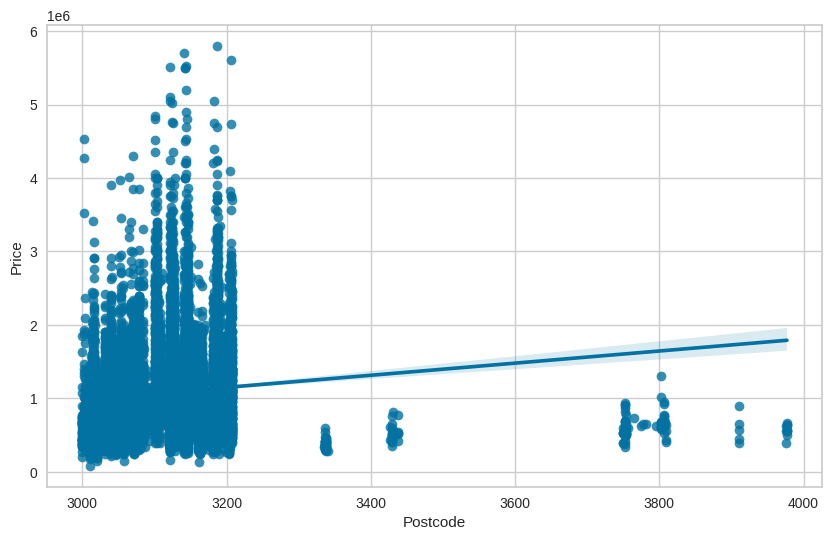

In [398]:
plt.figure(figsize=(10,6))
sns.regplot(x="Postcode", y="Price", data=df)
pearson_coef, p_value = stats.pearsonr(df['Postcode'], df['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

r is close to 0, it suggests a weak or no linear relationship. In other words, the variables are not strongly correlated. So we drop it.


The Pearson Correlation Coefficient is 0.08451261195986952  with a P-value of P = 2.823088667102645e-20


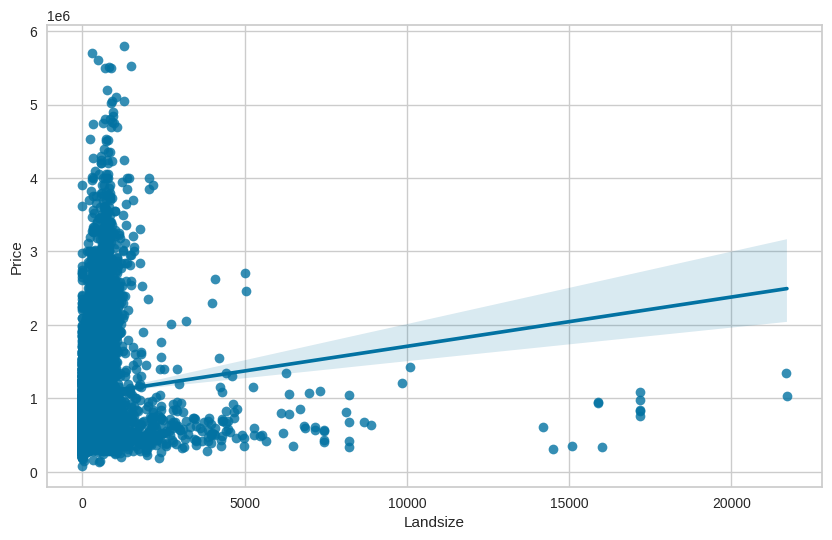

In [399]:
plt.figure(figsize=(10,6))
sns.regplot(x="Landsize", y="Price", data=df)
pearson_coef, p_value = stats.pearsonr(df['Landsize'], df['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

r is close to 0, it suggests a weak or no linear relationship. In other words, the variables are not strongly correlated. So we drop it.



The Pearson Correlation Coefficient is 0.019632111165205544  with a P-value of P = 0.03240079763936834


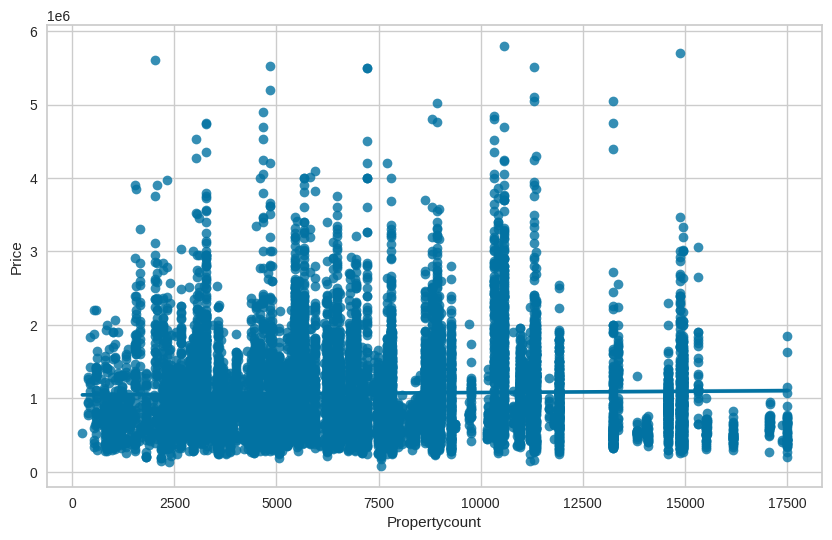

In [400]:
plt.figure(figsize=(10,6))
sns.regplot(x="Propertycount", y="Price", data=df)
pearson_coef, p_value = stats.pearsonr(df['Propertycount'], df['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

r is close to 0, it suggests a weak or no linear relationship. In other words, the variables are not strongly correlated. So we drop *Propertycount*.

The Pearson Correlation Coefficient is -0.19385484205282438  with a P-value of P = 6.49969633902277e-101


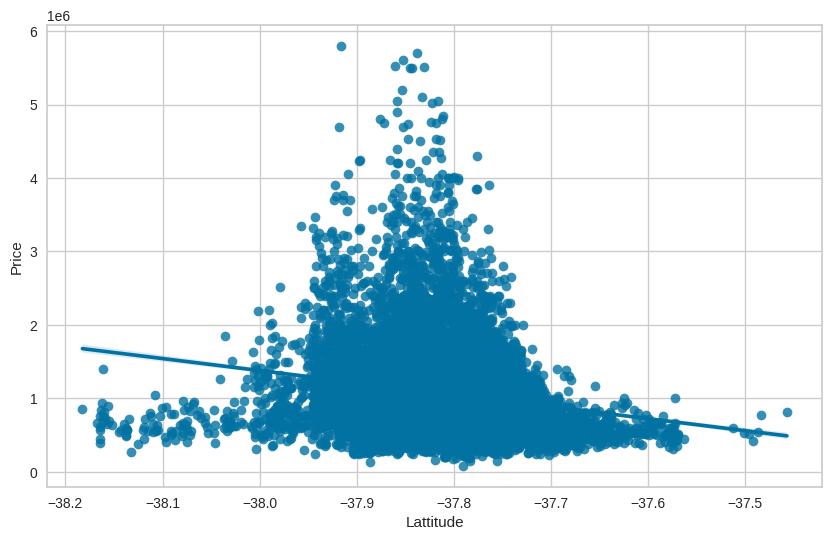

In [401]:
plt.figure(figsize=(10,6))
sns.regplot(x="Lattitude", y="Price", data=df)
pearson_coef, p_value = stats.pearsonr(df['Lattitude'], df['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.02041024323612378  with a P-value of P = 0.026131905183001833


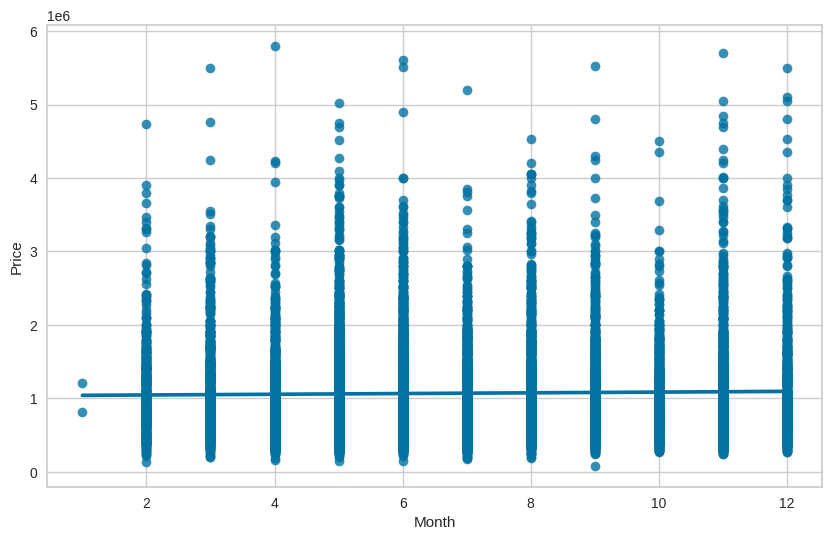

In [402]:
import seaborn as sns
from scipy import stats
plt.figure(figsize=(10,6))
sns.regplot(x="Month", y="Price", data=df)
pearson_coef, p_value = stats.pearsonr(df['Month'], df['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

With Month features there are no correletion. r = 0, so we will drop it.

In [403]:
df = df.drop(["Month"], axis=1)

The Pearson Correlation Coefficient is -0.022675119751662677  with a P-value of P = 0.013468853701093133


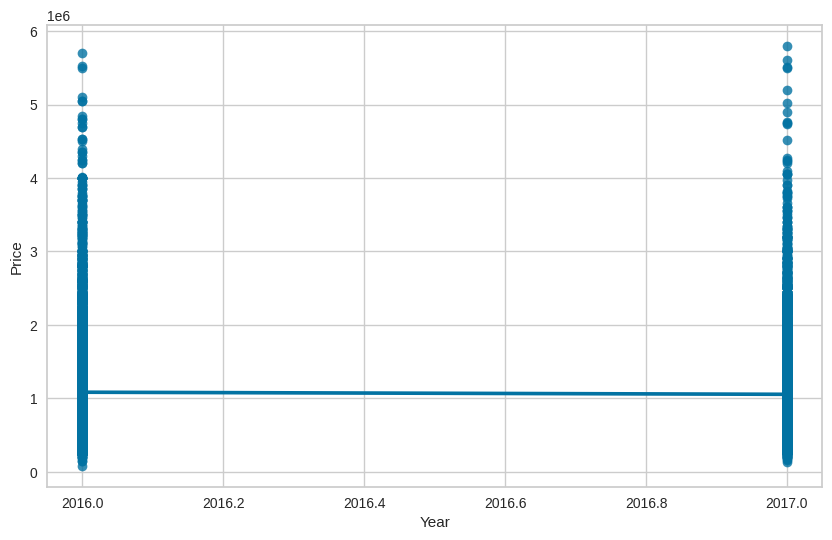

In [404]:
import seaborn as sns
from scipy import stats
plt.figure(figsize=(10,6))
sns.regplot(x="Year", y="Price", data=df)
pearson_coef, p_value = stats.pearsonr(df['Year'], df['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

With Year features there are no correletion. r = 0, so we will drop it.

In [405]:
df = df.drop(["Year"], axis=1)

In [406]:
## Now we have df with dimention
df.shape

(11876, 16)

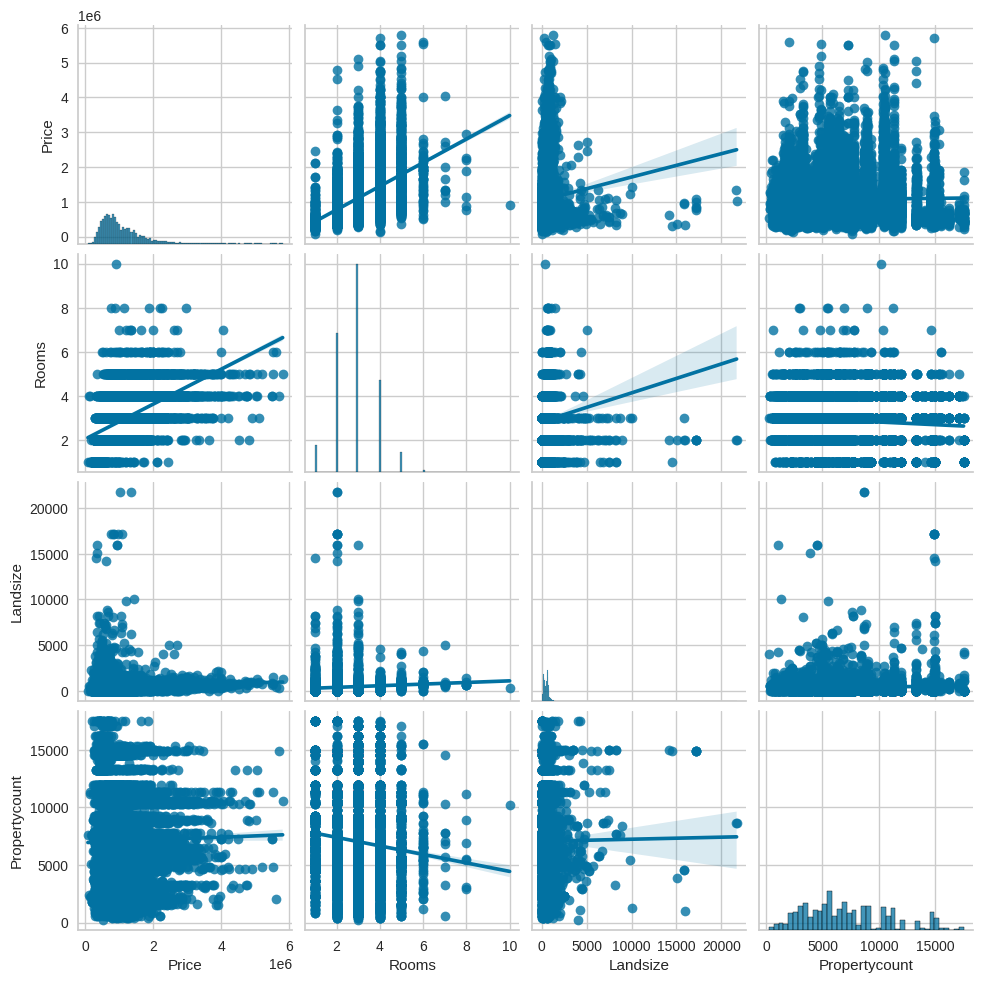

In [408]:
sns.pairplot(df, vars=["Price","Rooms", "Landsize","Propertycount"], kind="reg")

## **b- Box Plot**
These plots are used for categorical data to determine the importance of features for prediction.

In [410]:
# find categorical Columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols
print(f'categorical Columns: {cat_cols}')

categorical Columns: ['Suburb', 'Address', 'Type', 'CouncilArea', 'Regionname']


<Axes: xlabel='Regionname', ylabel='Price'>

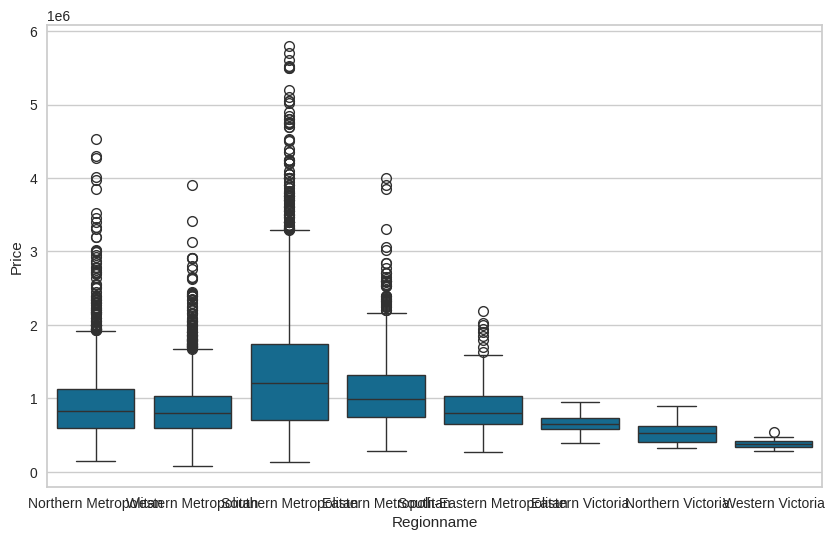

In [411]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Regionname", y="Price", data=df)

This plot shows Regionnames and how they affect the price. *Southern Mrtropolitan* with the highest price range while *Western Victoria* with lowest price range. This feature can be used for prediction.

<Axes: xlabel='Type', ylabel='Price'>

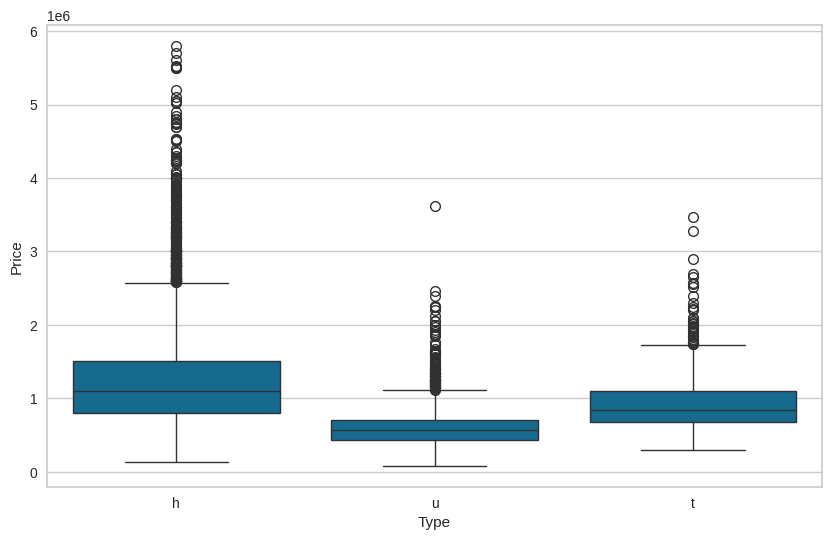

In [412]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Type", y="Price", data=df)

It is observed that the price range vary for each type h - house; u - unit, duplex; t - townhouse. This indicates the categories can vary with price hence feature can be used for prediction

<Axes: xlabel='CouncilArea', ylabel='Price'>

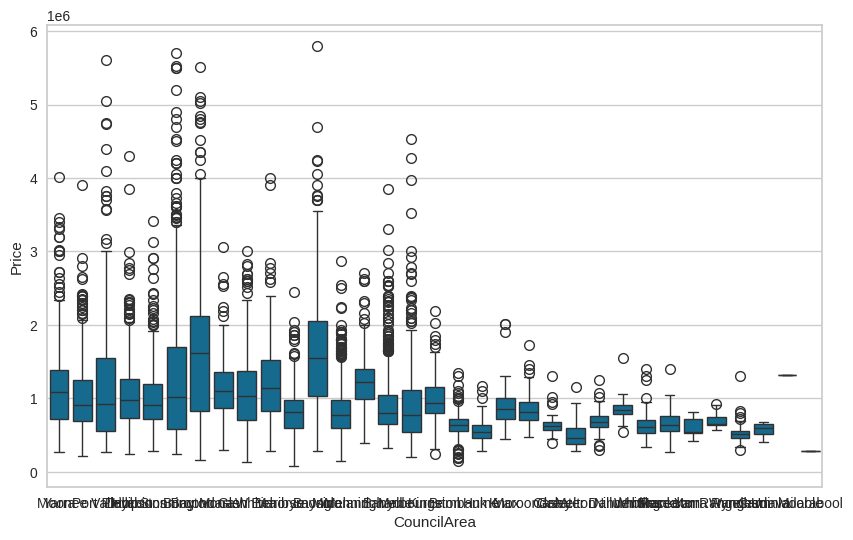

In [413]:
plt.figure(figsize=(10,6))
sns.boxplot(x="CouncilArea", y="Price", data=df)

<Axes: xlabel='Address', ylabel='Price'>

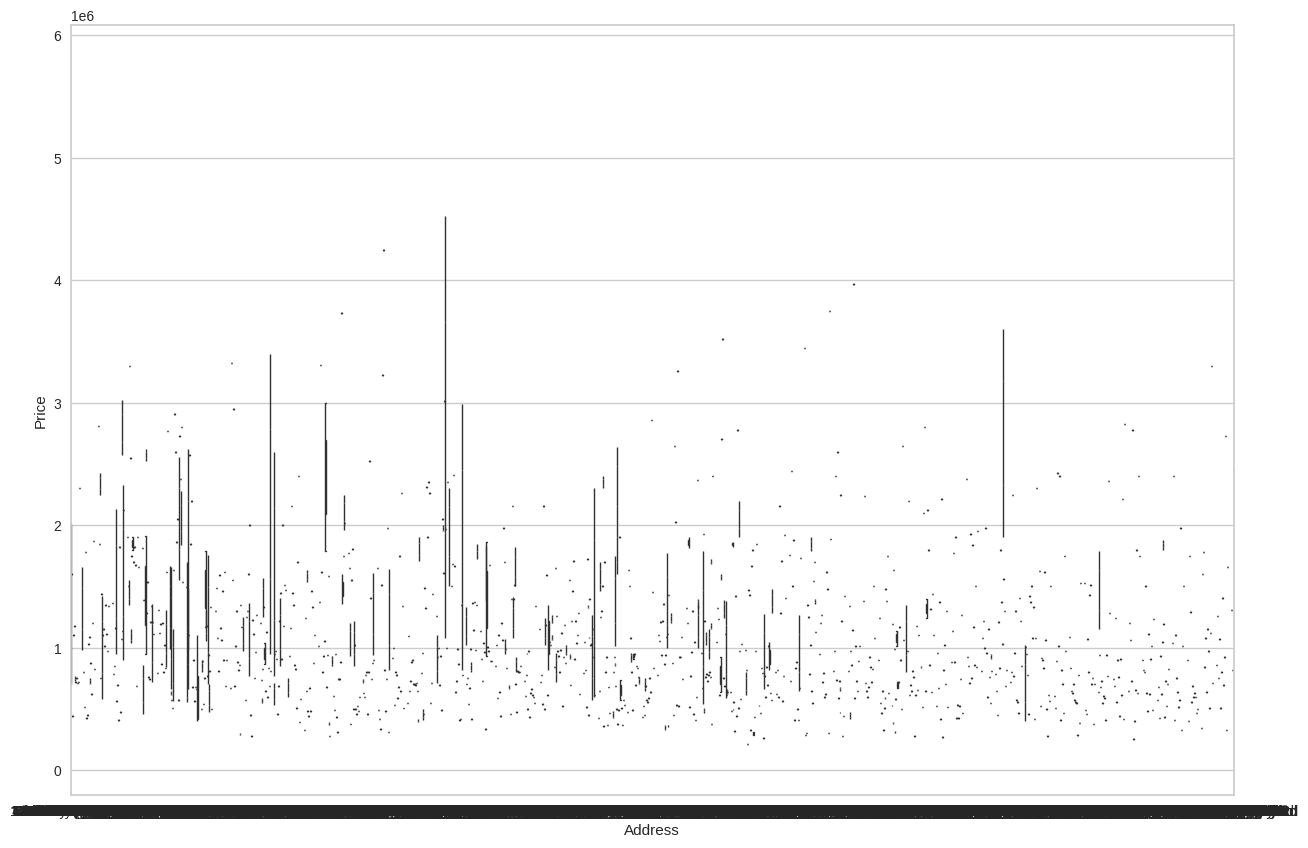

In [414]:
plt.figure(figsize=(15,10))
#df.sample(2000).Suburb.value_counts().plot.bar()
sns.boxplot(x="Address", y="Price", data=df)

In [415]:
df.Address.value_counts()

Address
5 Margaret St          3
5 Charles St           3
14 Arthur St           3
28 Blair St            3
13 Robinson St         3
                      ..
34 MacEdon St          1
19 Mitchell St         1
3/4 Navigator St       1
902/16 Liverpool St    1
54 Pentland Pde        1
Name: count, Length: 11704, dtype: int64

#### Address attribute, almost all values are different: Won't be much insight. We will drop it.

In [416]:
### Almost all values are different: Won't be much insight

df = df.drop(["Address"], axis=1)

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11876 entries, 0 to 12212
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         11876 non-null  object 
 1   Rooms          11876 non-null  int64  
 2   Type           11876 non-null  object 
 3   Price          11876 non-null  float64
 4   Distance       11876 non-null  float64
 5   Postcode       11876 non-null  float64
 6   Bedroom2       11876 non-null  float64
 7   Bathroom       11876 non-null  float64
 8   Car            11876 non-null  float64
 9   Landsize       11876 non-null  float64
 10  CouncilArea    11876 non-null  object 
 11  Lattitude      11876 non-null  float64
 12  Longtitude     11876 non-null  float64
 13  Regionname     11876 non-null  object 
 14  Propertycount  11876 non-null  float64
dtypes: float64(10), int64(1), object(4)
memory usage: 1.4+ MB


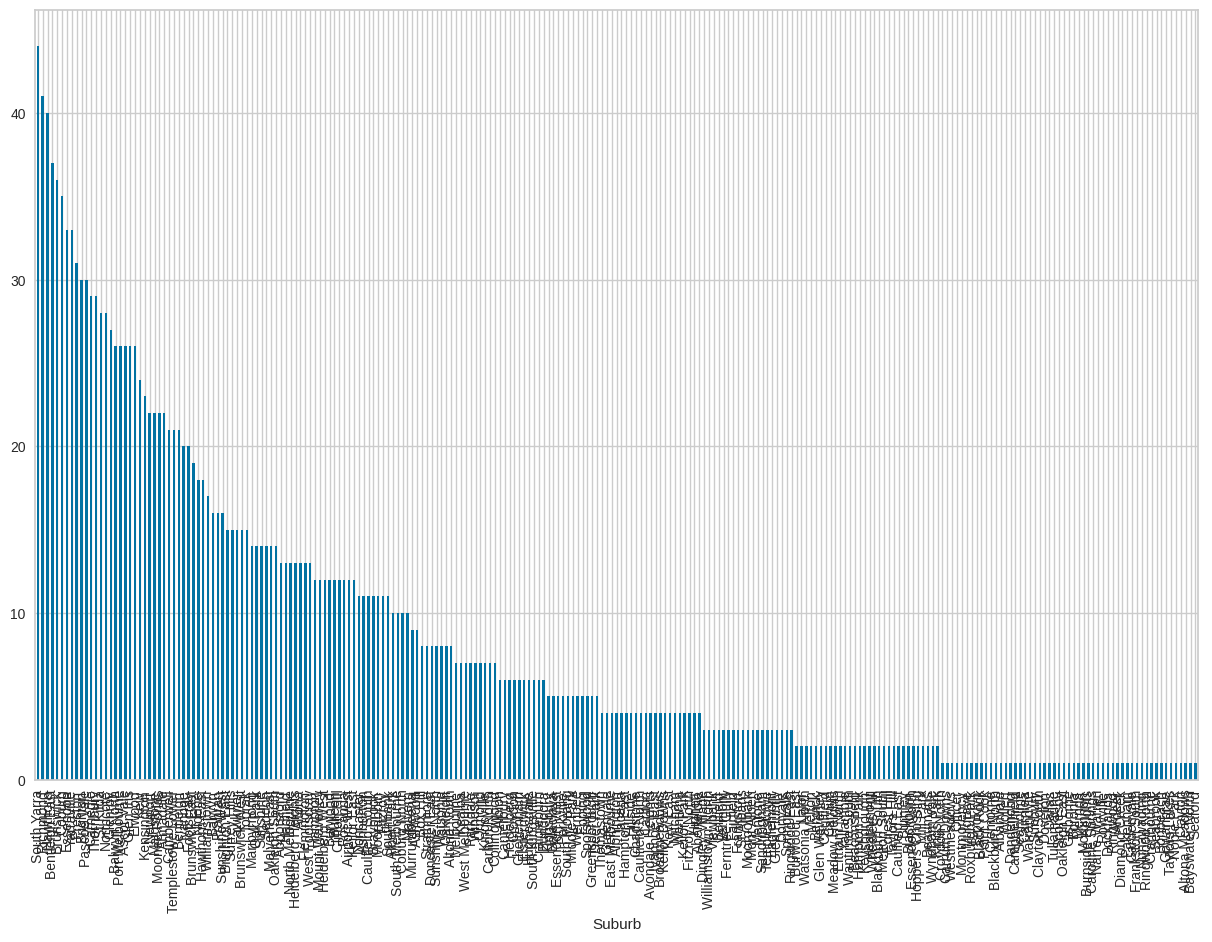

In [418]:
plt.figure(figsize=(15,10))
df.sample(2000).Suburb.value_counts().plot.bar()
#plt.xticks(rotation =90)
plt.show()

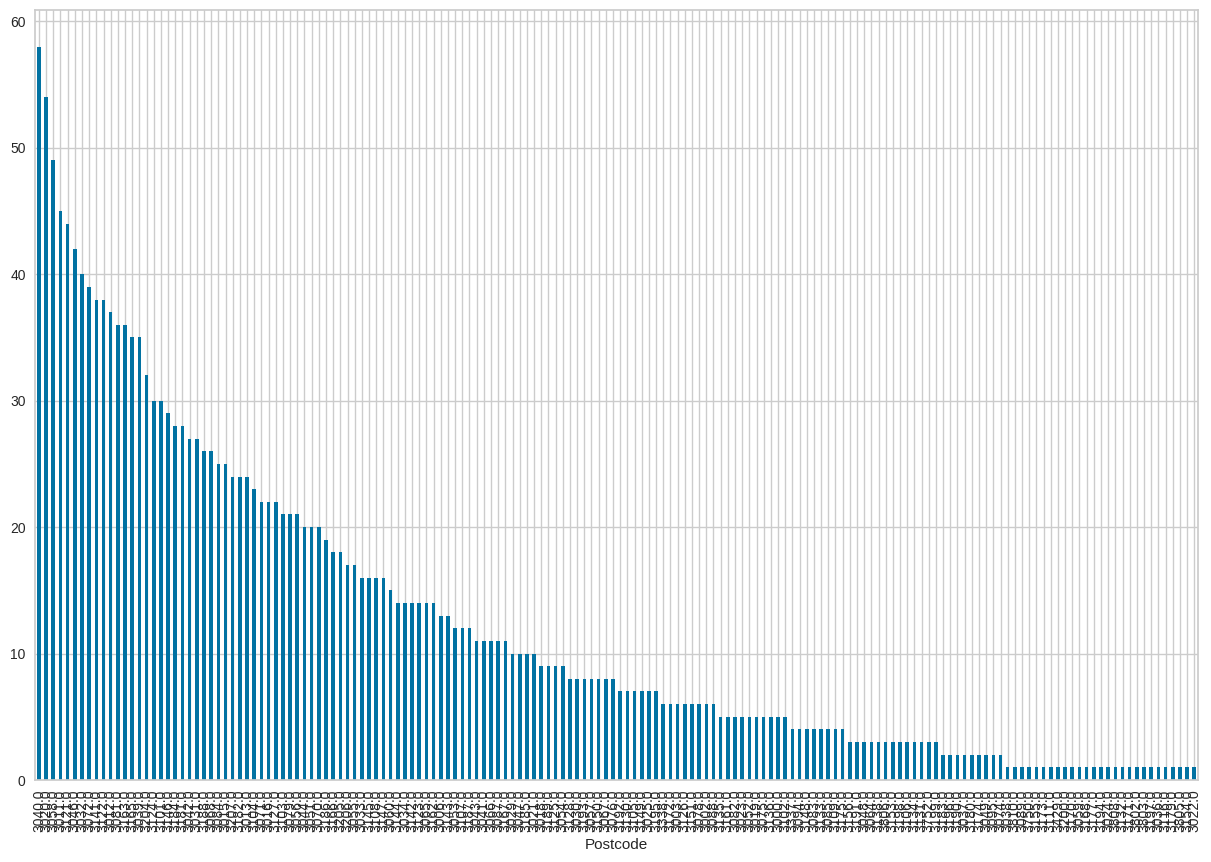

In [419]:
plt.figure(figsize=(15,10))
df.sample(2000).Postcode.value_counts().plot.bar()
plt.xticks(rotation =90)
plt.show()

#### Very similar distribution within suburb and Postcode. Choose one to drop it.


In [420]:
df_sub_postcode =pd.DataFrame(df.groupby(["Suburb", "Postcode"])["Price"].count()).apply(lambda x: x)
df_sub_postcode.reset_index(inplace=True)

In [421]:
df_sub_postcode.groupby(["Suburb"])["Postcode"].nunique().value_counts()

Postcode
1    306
Name: count, dtype: int64

So each postcode actually corresponds to each suburb

In [422]:
df_sub_postcode.rename(columns={"Price":"Count"}, inplace=True)
df_sub_postcode.head()

,Suburb,Postcode,Count
0,Abbotsford,3067.0,55
1,Aberfeldie,3040.0,40
2,Airport West,3042.0,61
3,Albanvale,3021.0,4
4,Albert Park,3206.0,64


In [423]:
df_sub_postcode.sort_values("Count", ascending=False, inplace=True)

<Axes: xlabel='Postcode', ylabel='Count'>

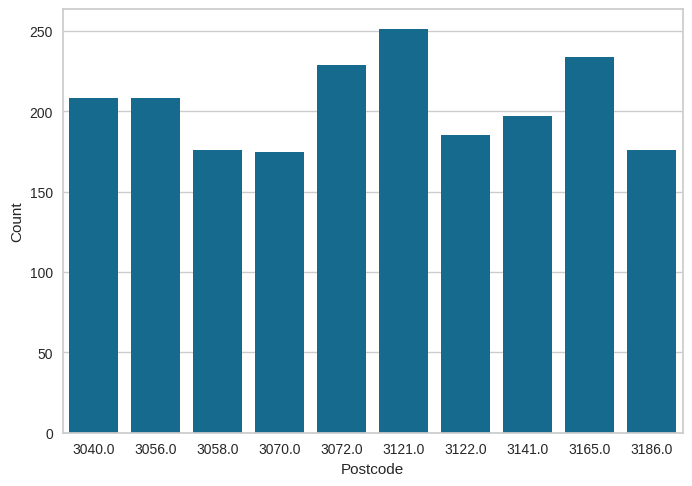

In [424]:
sns.barplot(df_sub_postcode[:10], x="Postcode", y="Count")   ### Data in top 10 postcodes

#### Drop suburb attribute which has same distribution with Postcode.

In [425]:
df = df.drop(["Suburb"], axis =1)
df.Postcode = df.Postcode.astype(str)

In [426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11876 entries, 0 to 12212
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          11876 non-null  int64  
 1   Type           11876 non-null  object 
 2   Price          11876 non-null  float64
 3   Distance       11876 non-null  float64
 4   Postcode       11876 non-null  object 
 5   Bedroom2       11876 non-null  float64
 6   Bathroom       11876 non-null  float64
 7   Car            11876 non-null  float64
 8   Landsize       11876 non-null  float64
 9   CouncilArea    11876 non-null  object 
 10  Lattitude      11876 non-null  float64
 11  Longtitude     11876 non-null  float64
 12  Regionname     11876 non-null  object 
 13  Propertycount  11876 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 1.4+ MB


<Axes: xlabel='Lattitude', ylabel='Longtitude'>

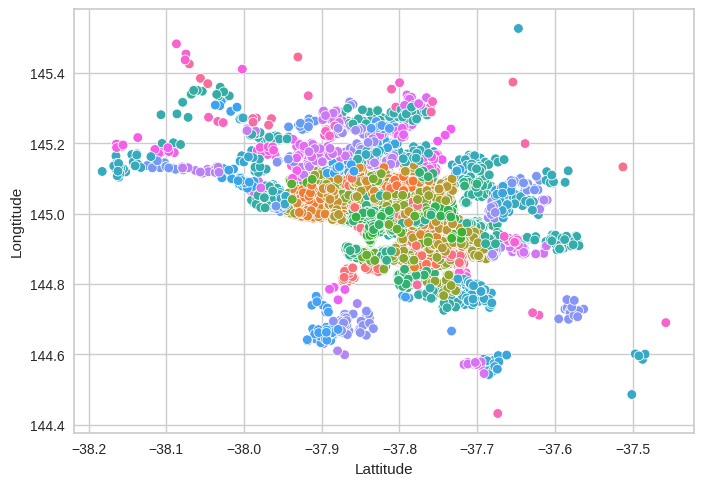

In [427]:
### Checking Postcode vs latittude and longitude

sns.scatterplot(df, x="Lattitude", y="Longtitude", hue="Postcode", legend=False)



<Axes: xlabel='Lattitude', ylabel='Longtitude'>

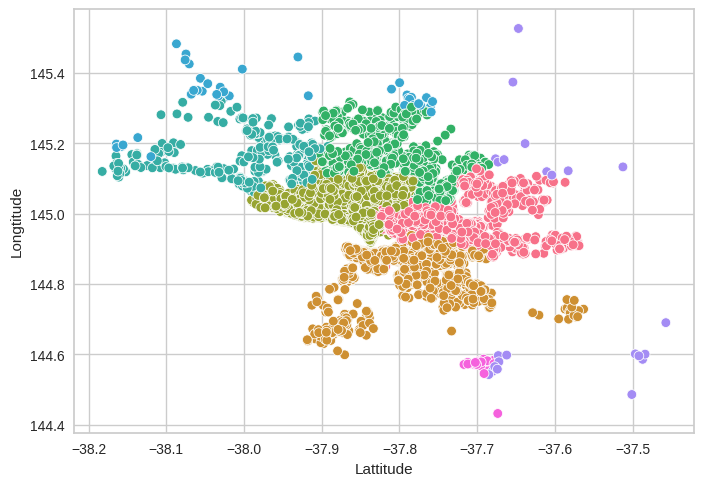

In [428]:
### Checking Regionname vs latittude and longitude

sns.scatterplot(df, x="Lattitude", y="Longtitude", hue="Regionname", legend=False)



<Axes: xlabel='Lattitude', ylabel='Longtitude'>

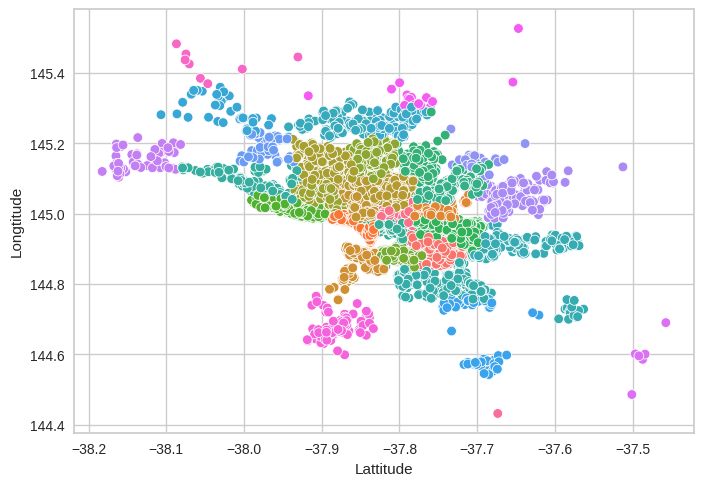

In [429]:
sns.scatterplot(df[~(df.CouncilArea=="Others")], x="Lattitude", y="Longtitude", hue="CouncilArea", legend=False)

###With these 3 attributes about location, drop latitude and longitude

In [430]:
### We can see a distiribution above With these 3 attributes.

df = df.drop(["Lattitude","Longtitude"], axis=1)

In [431]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11876 entries, 0 to 12212
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          11876 non-null  int64  
 1   Type           11876 non-null  object 
 2   Price          11876 non-null  float64
 3   Distance       11876 non-null  float64
 4   Postcode       11876 non-null  object 
 5   Bedroom2       11876 non-null  float64
 6   Bathroom       11876 non-null  float64
 7   Car            11876 non-null  float64
 8   Landsize       11876 non-null  float64
 9   CouncilArea    11876 non-null  object 
 10  Regionname     11876 non-null  object 
 11  Propertycount  11876 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.2+ MB


# **3- Data Transformation**
Label encoding of categorical features in the training set. Label encoding is converting categorical data into numerical data since the model cant understand textual data.

In [432]:
# find categorical Columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols
print(f'categorical Columns: {cat_cols}')

categorical Columns: ['Type', 'Postcode', 'CouncilArea', 'Regionname']


## ***a- Label encoding***

In [433]:
#----Data Preparation----
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df.Type = labelencoder.fit_transform(df.Type)
df.Postcode = labelencoder.fit_transform(df.Postcode)
df.CouncilArea = labelencoder.fit_transform(df.CouncilArea)
df.Regionname = labelencoder.fit_transform(df.Regionname)


In [434]:
# Checking on the remaining features and if label encoding is applied to all categorical features
df.head(10)

,Rooms,Type,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Regionname,Propertycount
0,2,0,1480000.0,2.5,53,2.0,1.0,1.0,202.0,31,2,4019.0
1,2,0,1035000.0,2.5,53,2.0,1.0,0.0,156.0,31,2,4019.0
2,3,0,1465000.0,2.5,53,3.0,2.0,0.0,134.0,31,2,4019.0
3,3,0,850000.0,2.5,53,3.0,2.0,1.0,94.0,31,2,4019.0
4,4,0,1600000.0,2.5,53,3.0,1.0,2.0,120.0,31,2,4019.0
5,2,0,941000.0,2.5,53,2.0,1.0,0.0,181.0,31,2,4019.0
6,3,0,1876000.0,2.5,53,4.0,2.0,0.0,245.0,31,2,4019.0
7,2,0,1636000.0,2.5,53,2.0,1.0,2.0,256.0,31,2,4019.0
8,1,2,300000.0,2.5,53,1.0,1.0,1.0,0.0,31,2,4019.0
9,2,0,1097000.0,2.5,53,3.0,1.0,2.0,220.0,31,2,4019.0


## **b- Normalization**
 z-score used for scaling down the features between the range of -1 and 1. This helps the model make better prediction as it is easy to understand. The scaling is applied to the training and testing set. Also we can use min-max normalization.

In [435]:
# Calculate the z-score with scipy
import scipy.stats as stats
df = stats.zscore(df)

In [436]:
df

,Rooms,Type,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Regionname,Propertycount
0,-0.932226,-0.668483,0.649276,-1.298395,-0.459076,-0.895949,-0.757424,-0.598384,-0.353085,1.622785,-0.920607,-0.815468
1,-0.932226,-0.668483,-0.058001,-1.298395,-0.459076,-0.895949,-0.757424,-1.652277,-0.411091,1.622785,-0.920607,-0.815468
2,0.107120,-0.668483,0.625436,-1.298395,-0.459076,0.132198,0.692007,-1.652277,-0.438833,1.622785,-0.920607,-0.815468
3,0.107120,-0.668483,-0.352038,-1.298395,-0.459076,0.132198,0.692007,-0.598384,-0.489273,1.622785,-0.920607,-0.815468
4,1.146466,-0.668483,0.840003,-1.298395,-0.459076,0.132198,-0.757424,0.455510,-0.456487,1.622785,-0.920607,-0.815468
...,...,...,...,...,...,...,...,...,...,...,...,...
12208,0.107120,-0.668483,0.339346,-0.524637,-1.367581,0.132198,-0.757424,-1.652277,-0.234551,-0.507737,1.070221,-0.184163
12209,-0.932226,1.671650,-0.812960,-0.920513,1.337287,-0.895949,-0.757424,-0.598384,-0.607807,1.115518,0.572514,-0.718941
12210,0.107120,-0.668483,-0.868112,2.840312,2.018666,0.132198,0.692007,0.455510,-0.103407,1.419878,-0.920607,-1.103980
12211,-0.932226,-0.668483,-0.510976,-0.614609,-1.408877,-0.895949,-0.757424,0.455510,-0.268598,0.100984,1.070221,-0.140579


# **4- Build Machine Learning Model**

##**a- Split data:**
Dividing the data for training set and testing set. X takes the all features while Y takes the target variable.

In [444]:
Y = df.Price
X = df.drop(["Price"], axis =1)

In [445]:
X.head()


,Rooms,Type,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Regionname,Propertycount
0,-0.932226,-0.668483,-1.298395,-0.459076,-0.895949,-0.757424,-0.598384,-0.353085,1.622785,-0.920607,-0.815468
1,-0.932226,-0.668483,-1.298395,-0.459076,-0.895949,-0.757424,-1.652277,-0.411091,1.622785,-0.920607,-0.815468
2,0.107120,-0.668483,-1.298395,-0.459076,0.132198,0.692007,-1.652277,-0.438833,1.622785,-0.920607,-0.815468
3,0.107120,-0.668483,-1.298395,-0.459076,0.132198,0.692007,-0.598384,-0.489273,1.622785,-0.920607,-0.815468
4,1.146466,-0.668483,-1.298395,-0.459076,0.132198,-0.757424,0.455510,-0.456487,1.622785,-0.920607,-0.815468


In [446]:
Y.head()

0    0.649276
1   -0.058001
2    0.625436
3   -0.352038
4    0.840003
Name: Price, dtype: float64

In [447]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data  # 30% for testing is used
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

## **b- Fit Model - Multiple Linear Regression**
Train dataset by calling multiple linear regression model and fitting the training set.

In [448]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression().fit(x_train, y_train)

In [449]:
#Making price prediction using the testing set
y_pred_reg = reg_model.predict(x_test)

##c- Model Evaluation


In [451]:
# Calculating the Mean Square Error for reg_model
from sklearn.metrics import mean_squared_error
mse_reg = mean_squared_error(y_test, y_pred_reg)
print('The mean square error for Multiple Linear Regression: ', mse_reg)

The mean square error for Multiple Linear Regression:  0.4059058116324196


In [452]:
#Calculating the Mean Absolute Error for MLR model
from sklearn.metrics import mean_absolute_error
mae_reg= mean_absolute_error(y_test, y_pred_reg)
print('The mean absolute error for Multiple Linear Regression: ', mae_reg)

The mean absolute error for Multiple Linear Regression:  0.44503791333433934


# **8- Random Forest Model (checking other Models)**
Calling the random forest model and fitting the training data

In [453]:
rf_model = RandomForestRegressor().fit(x_train, y_train)

In [454]:
#Prediction of house prices using the testing data
y_pred_rf = rf_model.predict(x_test)


In [455]:
#Random Forest Evaluation
#Calculating the Mean Square Error for Random Forest Model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print('The mean square error of price and predicted value is: ', mse_rf)

The mean square error of price and predicted value is:  0.1931418660638486


In [456]:
#Calculating the Mean Absolute Error for Random Forest Model
mae_rf= mean_absolute_error(y_test, y_pred_rf)
print('The mean absolute error of price and predicted value is: ', mae_rf)

The mean absolute error of price and predicted value is:  0.2823022308618184


# **9- LASSO Model**

In [458]:
#Calling the model and fitting the training data
from sklearn.linear_model import Lasso
lasso_model = Lasso().fit(x_train,y_train)

In [459]:
#Price prediction uisng testing data
y_pred_lasso = lasso_model.predict(x_test)

In [460]:
# Lasso model evaluation
mae_lasso= mean_absolute_error(y_test, y_pred_lasso)
print('The mean absolute error of price and predicted value is: ', mae_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print('The mean square error of price and predicted value is: ', mse_lasso)

The mean absolute error of price and predicted value is:  0.7252526842632531
The mean square error of price and predicted value is:  0.9706597400406499


# **10- Model Comparison**

In [463]:
scores = [('Multiple Linear Regression', mae_reg),
          ('Random Forest', mae_rf),
          ('LASSO', mae_lasso)
         ]

mae_result = pd.DataFrame(data = scores, columns=['Model', 'MAE Score'])
mae_result

,Model,MAE Score
0,Multiple Linear Regression,0.445038
1,Random Forest,0.282302
2,LASSO,0.725253


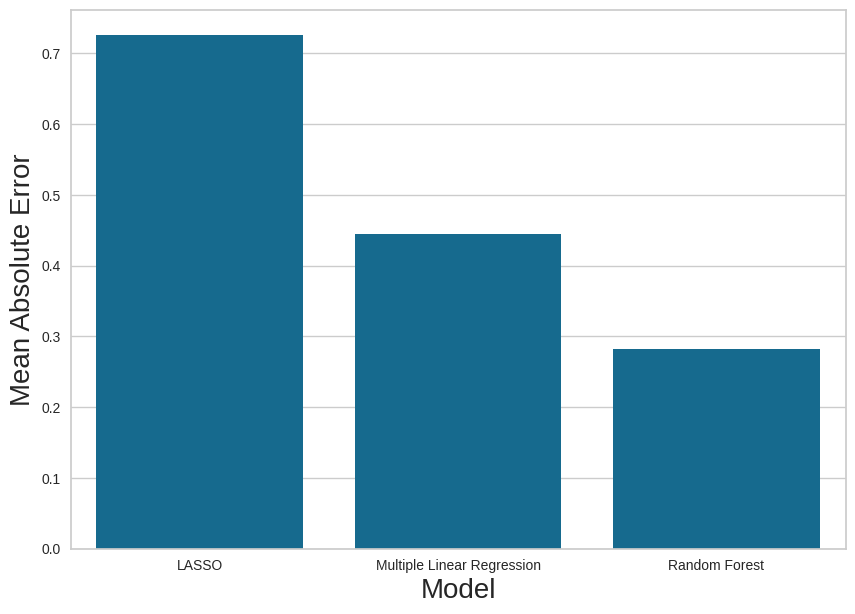

In [464]:
mae_result.sort_values(by=(['MAE Score']), ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(10,7))
sns.barplot(x = mae_result['Model'], y=mae_result['MAE Score'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('Mean Absolute Error', size=20)

plt.show()

**Based on the MAE, it is concluded that the* Random Forest* is the best regression model for predicting the car price based on the  predictor variables**